#### Importing Libraries & Settings

In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

pd.options.display.max_columns = 50
sns.set(style='darkgrid', rc={'axes.facecolor': '#00ff00'})

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\HP\Documents\\Computer Projects\\Machine Learning\\Datasets\\heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# cp = chest pain
# trestbps = resting blood pressure
# chol = cholesterol
# fbs = fasting blood sugar
# restecg = resting electocardiography
# exang = exercise induced angina
# oldpeak = ST depression induced
# slope = slope of the peak exercise
# ca = number of major vessels
# thal = normal, fixed defect, reversible defect
# target = 1 for disease and 0 for no disease

#### Getting Number of People with Heart Disease

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

#### Percentage of Male and Female

In [5]:
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
print(f'Women: {count_female*100/len(df.sex):.2f}%, Men: {count_male*100/len(df.sex):.2f}%')

Women: 30.44%, Men: 69.56%


#### Getting Mean of Data Series

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


#### Showing NaN Values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Creating Logistic Regression

In [8]:
y = df.target.values
x_data = df.drop(['target'], axis=1)

#### Splitting for Training & Testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.33, random_state=42)
print(X_train.shape[0], X_test.shape[0])
print(X_train.dtypes)
print(X_train.head())

686 339
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
866   41    1   2       112   250    0        1      179      0      0.0   
749   58    1   1       125   220    0        1      144      0      0.4   
212   50    1   0       150   243    0        0      128      0      2.6   
79    52    1   1       134   201    0        1      158      0      0.8   
148   52    1   3       152   298    1        1      178      0      1.2   

     slope  ca  thal  
866      2   0     2  
749      1   4     3  
212      1   0     3  
79       2   1     2  
148      1   0     3  


#### Creating Decision Tree Model

In [10]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### Training the Model

In [11]:
y_pred = model.predict(X_test)
print(f'{accuracy_score(y_test, y_pred) * 100:.2f}%')

81.12%


#### Predicting Class Label for Training Data

In [12]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

#### Getting Training Set of Accuracy Score

In [13]:
print(f'Training set accuracy score = {model.score(X_train, y_train):.5f}')
print(f'Testing set accuracy score = {model.score(X_test, y_test):.5f}')

Training set accuracy score = 0.86297
Testing set accuracy score = 0.81121


#### Visualizing Leaf Nodes

##### Using Matplotlib

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [328, 358]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.381\nsamples = 332\nvalue = [247, 85]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 148\nvalue = [71, 77]'),
 Text(0.0625, 0.125, 'gini = 0.344\nsamples = 86\nvalue = [19, 67]'),
 Text(0.1875, 0.125, 'gini = 0.271\nsamples = 62\nvalue = [52, 10]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.083\nsamples = 184\nvalue = [176, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.045\nsamples = 174\nvalue = [170, 4]'),
 Text(0.75, 0.625, 'x[9] <= 1.95\ngini = 0.353\nsamples = 354\nvalue = [81, 273]'),
 Text(0.625, 0.375, 'x[12] <= 2.5\ngini = 0.283\nsamples = 317\nvalue = [54, 263]'),
 Text(0.5625, 0.125, 'gini = 0.183\nsamples = 245\nvalue = [25, 220]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.394\nsamples = 37\nvalue = [27,

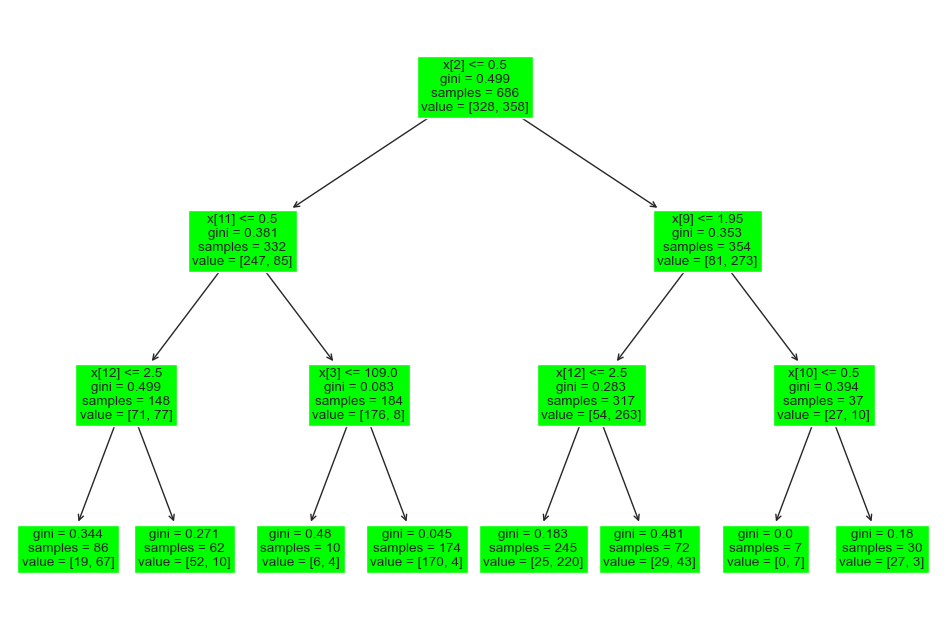

In [14]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model.fit(X_train, y_train))

##### Using Graphviz

In [15]:
# Getting class names from the dataset
class_names = df['target'].unique().astype(str)

# Generating the visualization
tree.export_graphviz(
    model, 
    out_file='heart_disease.dot',
    feature_names=x_data.columns,
    class_names=class_names,
    label='all',
    filled=True,
    rounded=True
)